# Personality Analysis using clustering
Pankajan T.

### Libraries used

In [28]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, MiniBatchKMeans, MeanShift, DBSCAN, Birch, OPTICS, AffinityPropagation, AgglomerativeClustering, SpectralClustering
from sklearn.mixture import GaussianMixture
from yellowbrick.cluster import KElbowVisualizer
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import unique
from numpy import where
from sklearn.manifold import TSNE
import matplotlib.colors

### Datasets Used:
 ### Big five personality test for personality clustering <br>
The five-factor model (FFM), also referred to as the Big Five personality traits and the OCEAN model, is a classification system used to group personality traits. By applying factor analysis, a statistical method used to analyze personality survey data, similar words are often used to describe different aspects of an individual's personality. For example, someone who is described as conscientious is more likely to be seen as "always prepared" as opposed to "messy". It should be noted that this theory is based on word association, rather than neuropsychological experiments, and uses everyday language to describe the human personality and psyche in five broad dimensions.

EXT1	I am the life of the party. <br>
EXT2	I don't talk a lot. <br>
EXT3	I feel comfortable around people. <br>
EXT4	I keep in the background.<br>
EXT5	I start conversations.<br>
EXT6	I have little to say.<br>
EXT7	I talk to a lot of different people at parties.<br>
EXT8	I don't like to draw attention to myself.<br>
EXT9	I don't mind being the center of attention.<br>
EXT10	I am quiet around strangers.<br>
EST1	I get stressed out easily.<br>
EST2	I am relaxed most of the time.<br>
EST3	I worry about things.<br>
EST4	I seldom feel blue.<br>
EST5	I am easily disturbed.<br>
EST6	I get upset easily.<br>
EST7	I change my mood a lot.<br>
EST8	I have frequent mood swings.<br>
EST9	I get irritated easily.<br>
EST10	I often feel blue.<br>
AGR1	I feel little concern for others.<br>
AGR2	I am interested in people.<br>
AGR3	I insult people.<br>
AGR4	I sympathize with others' feelings.<br>
AGR5	I am not interested in other people's problems.<br>
AGR6	I have a soft heart.<br>
AGR7	I am not really interested in others.<br>
AGR8	I take time out for others.<br>
AGR9	I feel others' emotions.<br>
AGR10	I make people feel at ease.<br>
CSN1	I am always prepared.<br>
CSN2	I leave my belongings around.<br>
CSN3	I pay attention to details.<br>
CSN4	I make a mess of things.<br>
CSN5	I get chores done right away.<br>
CSN6	I often forget to put things back in their proper place.<br>
CSN7	I like order.<br>
CSN8	I shirk my duties.<br>
CSN9	I follow a schedule.<br>
CSN10	I am exacting in my work.<br>
OPN1	I have a rich vocabulary.<br>
OPN2	I have difficulty understanding abstract ideas.<br>
OPN3	I have a vivid imagination.<br>
OPN4	I am not interested in abstract ideas.<br>
OPN5	I have excellent ideas.<br>
OPN6	I do not have a good imagination.<br>
OPN7	I am quick to understand things.<br>
OPN8	I use difficult words.<br>
OPN9	I spend time reflecting on things.<br>
OPN10	I am full of ideas.<br>

The time spent on each question is also recorded in milliseconds. These are the variables ending in _E. This was calculated by taking the time when the button for the question was clicked minus the time of the most recent other button click.<br>

dateload    The timestamp when the survey was started.<br>
screenw     The width the of user's screen in pixels<br>
screenh     The height of the user's screen in pixels<br>
introelapse The time in seconds spent on the landing / intro page<br>
testelapse  The time in seconds spent on the page with the survey questions<br>
endelapse   The time in seconds spent on the finalization page <br>
IPC         The number of records from the user's IP address in the dataset. For max cleanliness, only use records where this value is 1. High values can be because of shared <br>networks (e.g. entire universities) or multiple submissions
country     The country, determined by technical information (NOT ASKED AS A QUESTION) <br>
lat_appx_lots_of_err    approximate latitude of user. determined by technical information, THIS IS NOT VERY ACCURATE. Read the article "How an internet mapping glitch turned a random Kansas farm into a digital hell" to learn about the perils of relying on this information <br>
long_appx_lots_of_err   approximate longitude of user<br>


In [30]:

def read_bf(scale=False,fraction=1):
    data = pd.read_csv('IPIP-FFM-data-8Nov2018/data-final.csv',sep='\t')
    data.drop(data.columns[50:],axis=1,inplace=True)
    data.dropna(inplace=True)
    if scale:
        columns = list(data.columns)
        scaler = MinMaxScaler(feature_range=(0,1))
        data = scaler.fit_transform(data)
        data = pd.DataFrame(data, columns=columns)
    if fraction!=1:
        data = data.sample(frac=fraction)
    return data

### Goal
The target for this project is to analyze the dataset using the clustering and segment the data into subgroups and findout the deeper understanding.

In [3]:
def visualize_bf(data,trait,color):
    data_temp=[column for column in data if column.startswith(trait)]
    plt.figure(figsize=(40,60))
    for i in range(1, 11):
        plt.subplot(10,5,i)
        plt.hist(data[data_temp[i-1]], bins=14, color= color, alpha=.5)
        plt.title(data_temp[i-1], fontsize=18)

In [4]:
def cluster_vis(data, predictions):
    pca = PCA(n_components=2)
    pca_fit = pca.fit_transform(data)
    df_pca = pd.DataFrame(data=pca_fit, columns=['PCA1', 'PCA2'])
    df_pca['Clusters'] = predictions
    plt.figure(figsize=(10,10))
    sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='Clusters', palette='Set2', alpha=0.8)
    plt.title('Personality Clusters after PCA');

In [5]:
def find_clusters(data, model, vis=False):
    yhat = model.fit_predict(data)
    print(unique(yhat, return_counts=True))
    if vis:
        cluster_vis(data, yhat)

In [6]:
data_bf=read_bf()

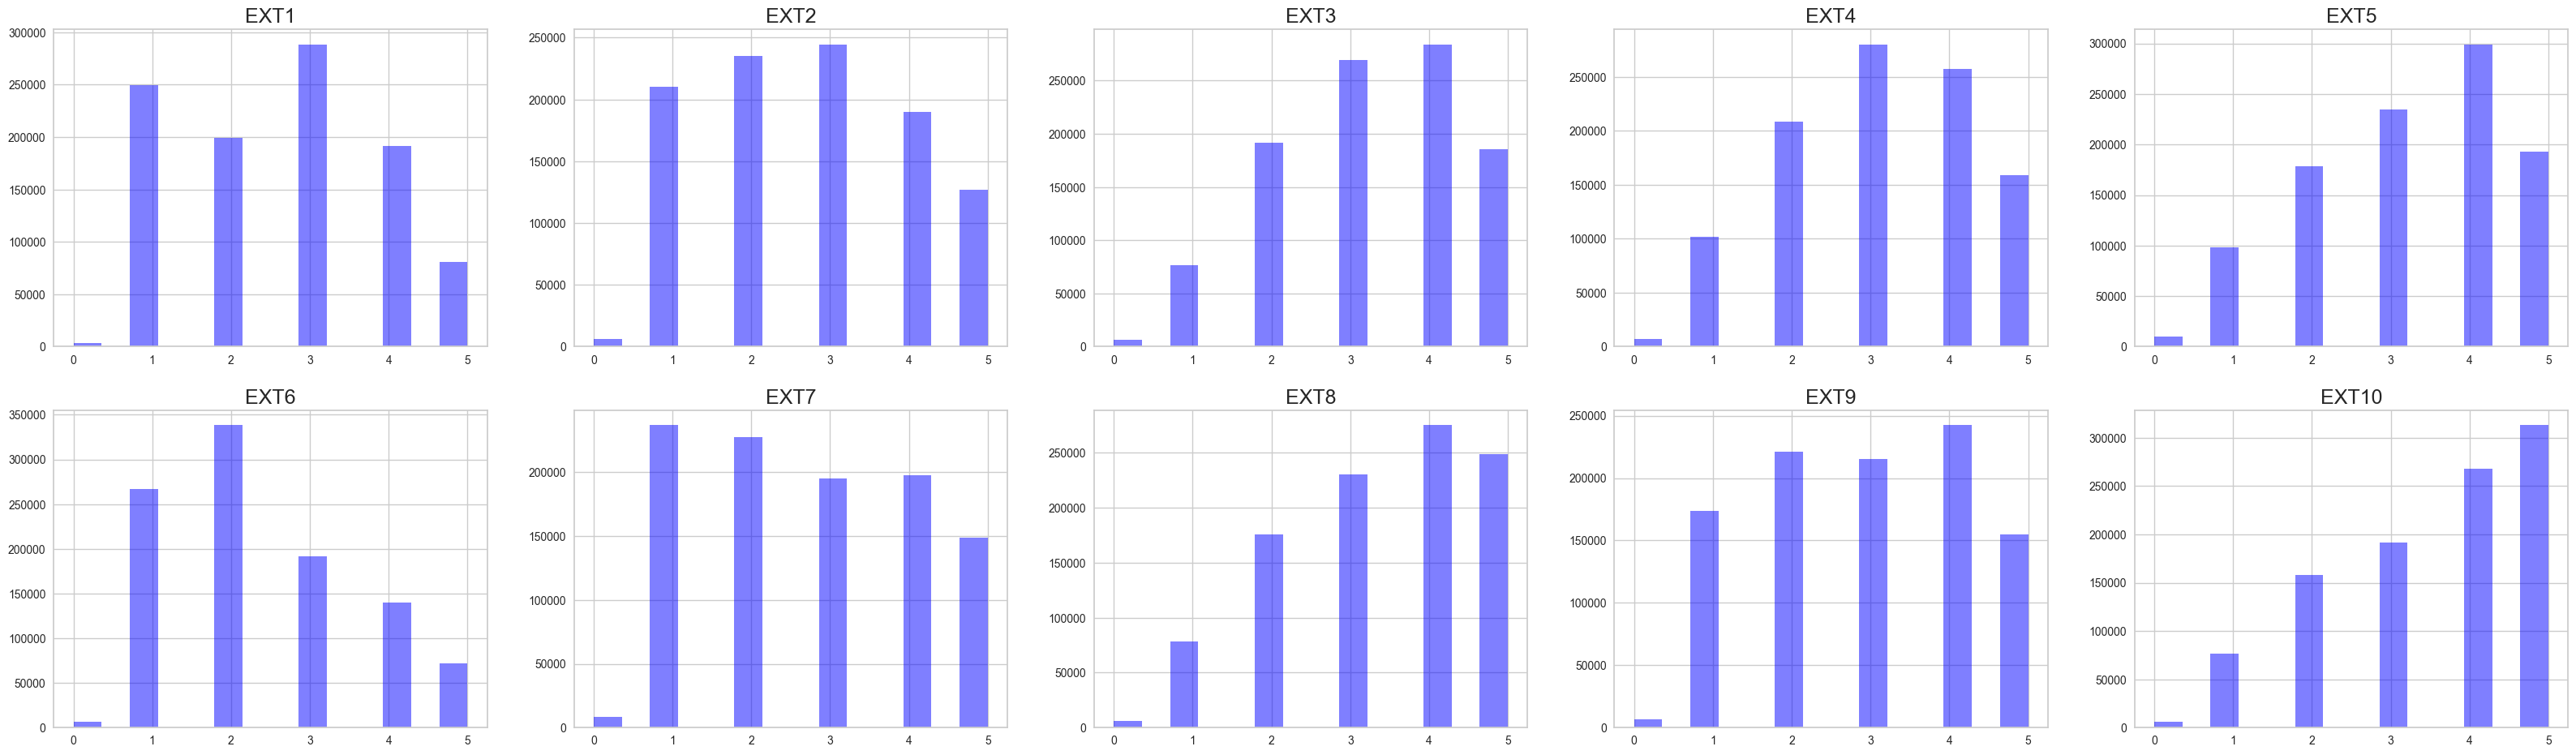

In [7]:
visualize_bf(data_bf,'EXT','blue')

There are no noticable outliers or NA cells in the data,  So no need for data cleaning

## 2. K-means

e:\programes\python\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
e:\programes\python\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
e:\programes\python\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
e:\programes\python\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
e:\programes\python\lib\site-packages\sklearn\cluster\_kmeans.py:870: Future

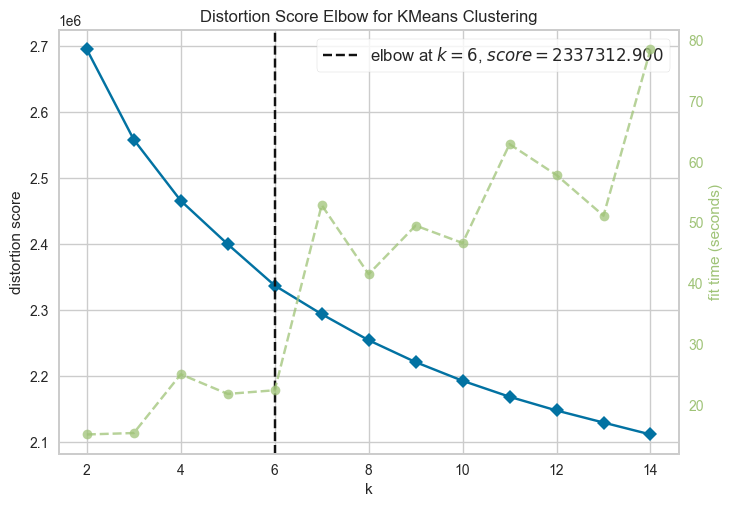

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [8]:
df_sample = read_bf(scale=True, fraction=1)

kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2,15))
visualizer.fit(df_sample)
visualizer.poof()


e:\programes\python\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(array([0, 1, 2, 3, 4]), array([165345, 226031, 212302, 210149, 199731], dtype=int64))


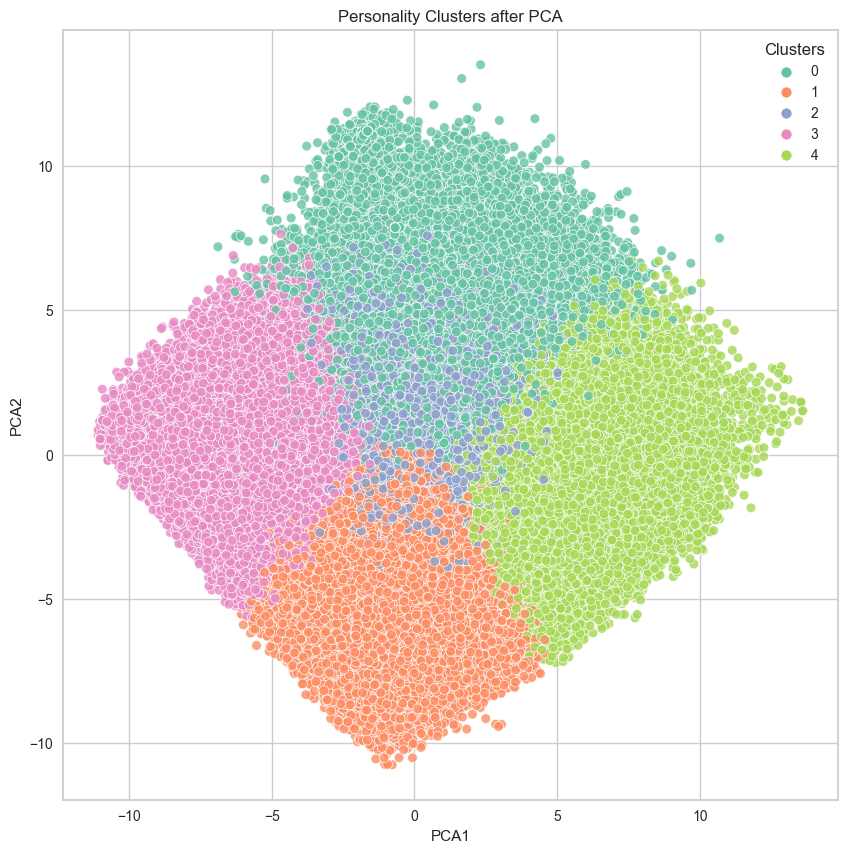

In [9]:
kmeans = KMeans(n_clusters=5)
df=data_bf.copy()
find_clusters(df,kmeans,vis=True)

In [ ]:
wcss = kmeans.inertia_

## 2. mini batch k means

e:\programes\python\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(array([0, 1, 2, 3, 4]), array([251118, 198678, 188469, 169514, 205779], dtype=int64))


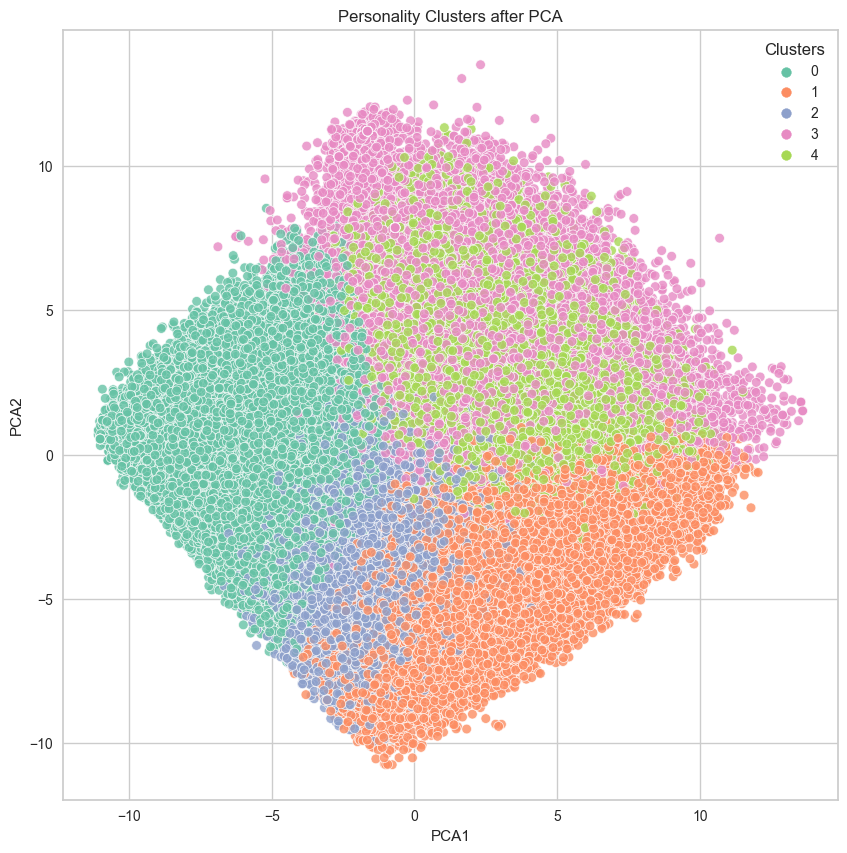

In [10]:
df=data_bf.copy()
model = MiniBatchKMeans(n_clusters=5)
find_clusters(df,model,vis=True)

## 3. Mean Shift

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21], dtype=int64), array([5014,   23,    1,    3,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    6,    1,    1,    1,    3,    1,    1,    3,    1],
      dtype=int64))


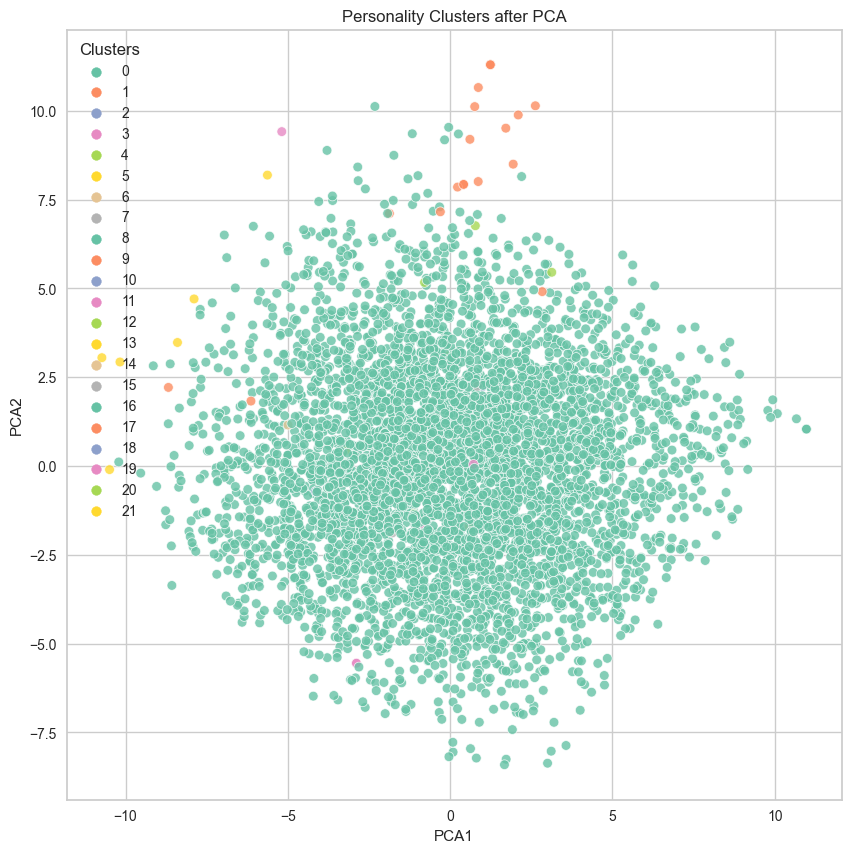

In [11]:
df=data_bf.sample(frac=0.005)
model = MeanShift()
find_clusters(df,model,vis=True)

## 4. DBSCAN

In [12]:
data2 = data_bf.sample(frac=0.05)
for i in [1,0.1,0.01,0.001,0.0001,0.00001]:
    for j in [10,100,1000,10000]:
        df=data2.copy()
        model = DBSCAN(eps=i, min_samples=j)
        print(i)
        print(j)
        find_clusters(df,model)

1
10
(array([-1,  0,  1,  2,  3], dtype=int64), array([50500,    36,   103,    21,    18], dtype=int64))
1
100
(array([-1,  0], dtype=int64), array([50575,   103], dtype=int64))
1
1000
(array([-1], dtype=int64), array([50678], dtype=int64))
1
10000
(array([-1], dtype=int64), array([50678], dtype=int64))
0.1
10
(array([-1,  0,  1,  2,  3], dtype=int64), array([50507,    36,    97,    20,    18], dtype=int64))
0.1
100
(array([-1], dtype=int64), array([50678], dtype=int64))
0.1
1000
(array([-1], dtype=int64), array([50678], dtype=int64))
0.1
10000
(array([-1], dtype=int64), array([50678], dtype=int64))
0.01
10
(array([-1,  0,  1,  2,  3], dtype=int64), array([50507,    36,    97,    20,    18], dtype=int64))
0.01
100
(array([-1], dtype=int64), array([50678], dtype=int64))
0.01
1000
(array([-1], dtype=int64), array([50678], dtype=int64))
0.01
10000
(array([-1], dtype=int64), array([50678], dtype=int64))
0.001
10
(array([-1,  0,  1,  2,  3], dtype=int64), array([50507,    36,    97,    20, 

(array([-1,  0,  1,  2,  3], dtype=int64), array([50507,    36,    97,    20,    18], dtype=int64))


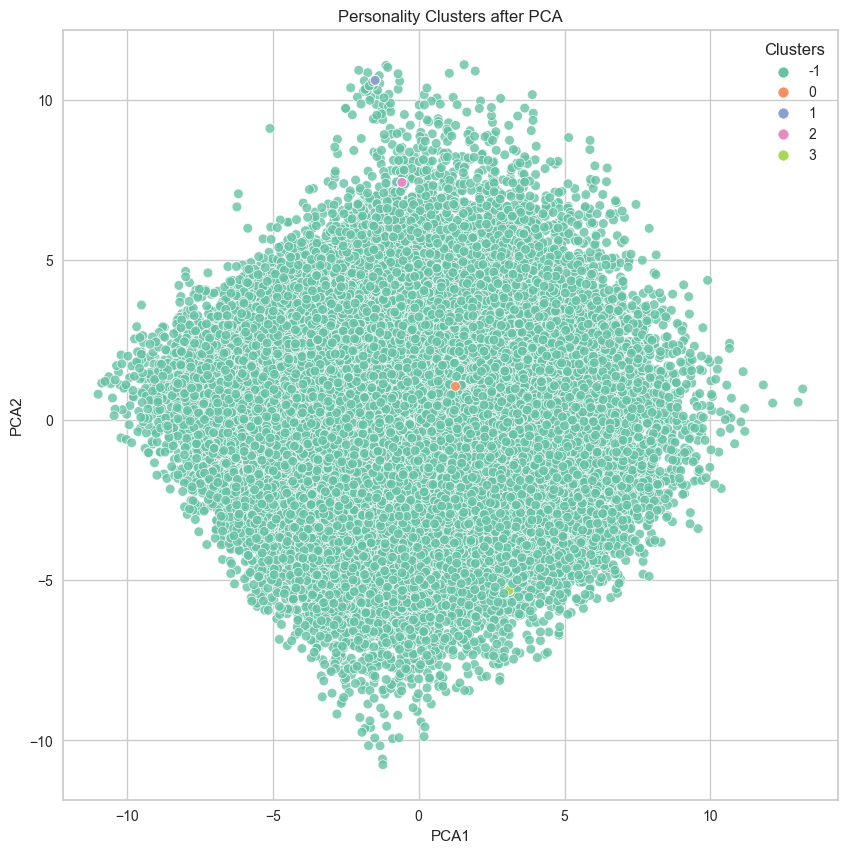

In [13]:
df = data2.copy()
model = DBSCAN(eps=0.001,min_samples=10)
find_clusters(df,model,vis=True)

## 5. K means-2

In [14]:
from scipy.cluster.vq import vq, kmeans, whiten
df = data_bf.copy()
whitened = whiten(df)
codes=5
centroids,_=kmeans(whitened,codes)

In [15]:
centroids

array([[2.44609722, 1.75471544, 3.36659504, 2.1047595 , 3.10245915,
        1.55250327, 2.45843058, 2.49587318, 2.48852432, 2.26531297,
        1.84432859, 3.03994603, 2.85122393, 2.56209332, 1.69427357,
        1.49236609, 1.65395697, 1.27383868, 1.67572198, 1.38050273,
        1.37704954, 3.81503721, 1.3214609 , 3.82926038, 1.57307919,
        3.22261522, 1.46390304, 3.76384085, 3.56019709, 3.83506322,
        3.28915516, 1.70243516, 4.13082442, 1.41280872, 2.59314654,
        1.47218405, 3.57666804, 1.60357057, 2.93920076, 3.77063566,
        3.32698244, 1.60059007, 3.68010912, 1.6680607 , 4.14071664,
        1.52840377, 4.27532367, 2.52218715, 4.00615616, 4.08158977],
       [1.59009087, 2.68083658, 2.09318794, 3.02603273, 1.94065671,
        2.29858332, 1.39591115, 3.00880701, 1.94876606, 3.1754887 ,
        2.03114004, 2.83164746, 2.91895877, 2.24384201, 1.96408794,
        1.75651529, 2.04663792, 1.68815738, 2.32870487, 2.02879746,
        2.38382119, 2.45433665, 2.22701654, 2.3

In [16]:
columns = [column for column in df]
columns=columns[:50]
def check_cluster(row,centroids,columns):
    dist=500000
    clust=-1
    for i in range(len(centroids)):
        diff = 0
        for j in range(len(columns)):
            diff+=(row[columns[j]]-centroids[i][j])**2
        if(diff<dist):
            dist=diff
            clust=i
    return clust
            
df['clusters'] = df.apply(lambda row: check_cluster(row,centroids,columns), axis=1)
df.tail()

EXT1  EXT2  EXT3  EXT4  EXT5  EXT6  EXT7  EXT8  EXT9  EXT10  ...  \
1015336   4.0   2.0   4.0   3.0   4.0   3.0   3.0   3.0   3.0    3.0  ...   
1015337   4.0   3.0   4.0   3.0   3.0   3.0   4.0   4.0   3.0    3.0  ...   
1015338   4.0   2.0   4.0   3.0   5.0   1.0   4.0   2.0   4.0    4.0  ...   
1015339   2.0   4.0   3.0   4.0   2.0   2.0   1.0   4.0   2.0    4.0  ...   
1015340   4.0   2.0   4.0   2.0   4.0   1.0   4.0   2.0   4.0    4.0  ...   

         OPN2  OPN3  OPN4  OPN5  OPN6  OPN7  OPN8  OPN9  OPN10  clusters  
1015336   2.0   4.0   3.0   4.0   2.0   4.0   2.0   2.0    4.0         3  
1015337   1.0   5.0   1.0   5.0   1.0   3.0   4.0   5.0    4.0         4  
1015338   1.0   5.0   1.0   4.0   1.0   5.0   5.0   4.0    5.0         3  
1015339   2.0   4.0   2.0   3.0   2.0   4.0   5.0   5.0    3.0         4  
1015340   1.0   5.0   1.0   3.0   1.0   5.0   4.0   5.0    5.0         3  

[5 rows x 51 columns]

In [17]:
yhat= df["clusters"].to_numpy()
df = df.drop(["clusters"],axis=1)

In [18]:
yhat

array([3, 4, 4, ..., 3, 4, 3], dtype=int64)

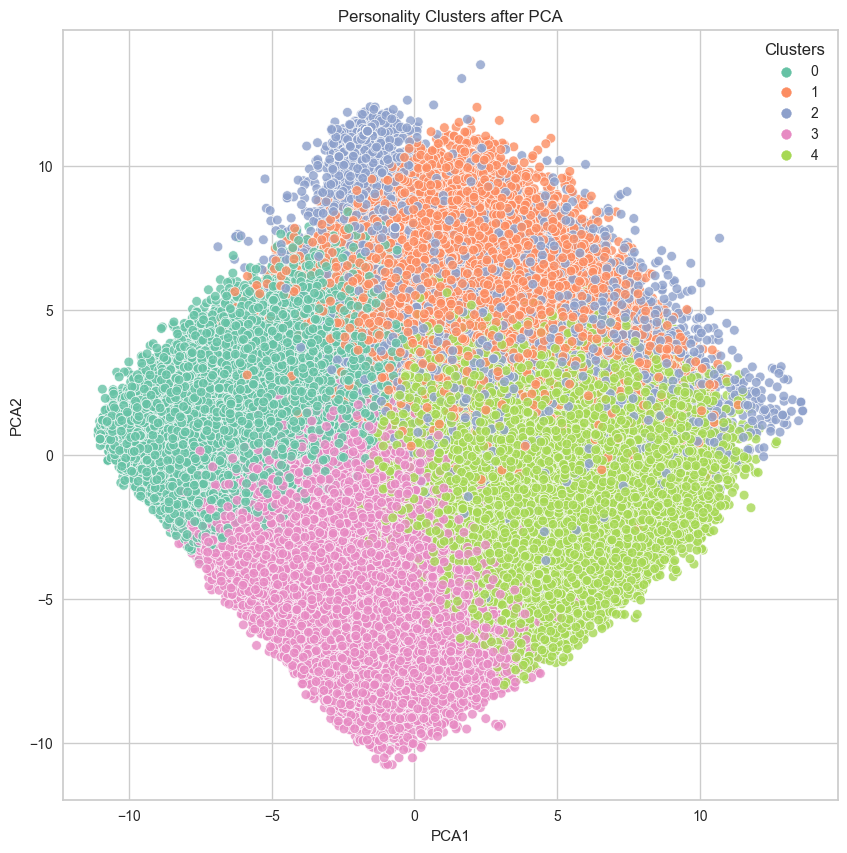

In [19]:
# In order to visualize in 2D graph we will use PCA

pca = PCA(n_components=2)
pca_fit = pca.fit_transform(df)

df_pca = pd.DataFrame(data=pca_fit, columns=['PCA1', 'PCA2'])
df_pca['Clusters'] = yhat
df_pca.head()

plt.figure(figsize=(10,10))
sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='Clusters', palette='Set2', alpha=0.8)
plt.title('Personality Clusters after PCA');

## 6. Birch

In [20]:
df = data_bf.sample(frac = 0.01)
for i in [0.1,0.01,0.001,0.0001]:
    model = Birch(threshold=i, n_clusters=5)
    print("threshold: ",i)
    find_clusters(df, model)

threshold:  0.1
(array([0, 1, 2, 3, 4], dtype=int64), array([ 897, 2950, 2400, 2000, 1889], dtype=int64))
threshold:  0.01
(array([0, 1, 2, 3, 4], dtype=int64), array([ 897, 2950, 2400, 2000, 1889], dtype=int64))
threshold:  0.001
(array([0, 1, 2, 3, 4], dtype=int64), array([ 897, 2950, 2400, 2000, 1889], dtype=int64))
threshold:  0.0001
(array([0, 1, 2, 3, 4], dtype=int64), array([ 897, 2950, 2400, 2000, 1889], dtype=int64))


(array([0, 1, 2, 3, 4], dtype=int64), array([2859, 1459, 2427, 1571, 1820], dtype=int64))


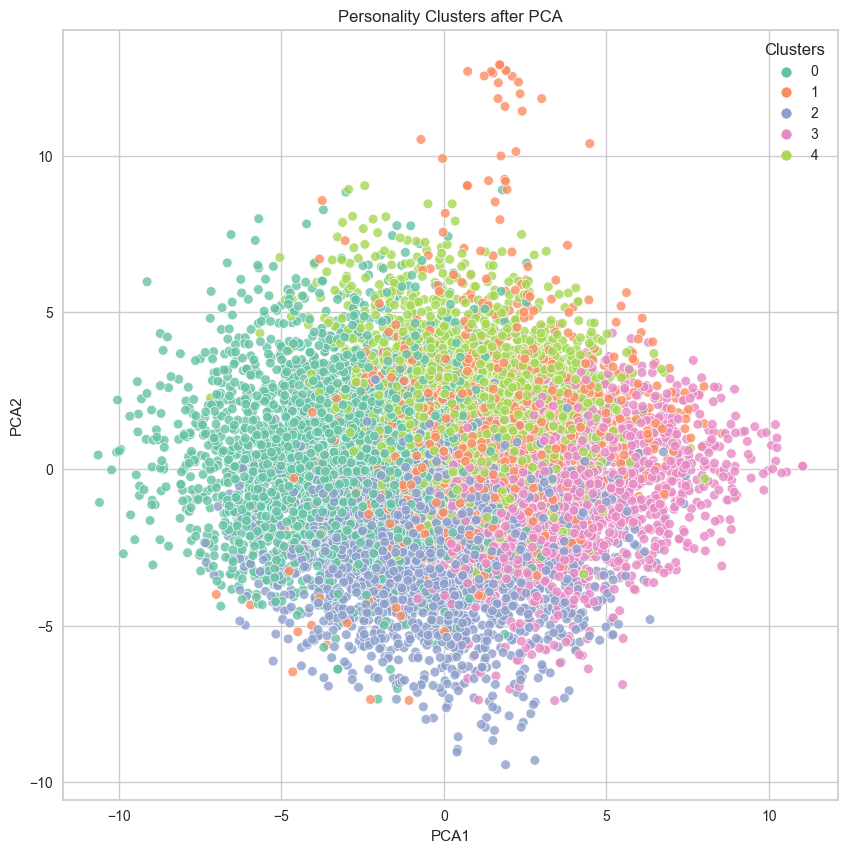

In [21]:
df = data_bf.sample(frac = 0.01)
model = Birch(threshold=0.1, n_clusters=5)
find_clusters(df,model,vis=True)

## 7. Gaussian Mixture

(array([0, 1, 2, 3, 4], dtype=int64), array([167800, 295729, 104481, 276756, 168792], dtype=int64))


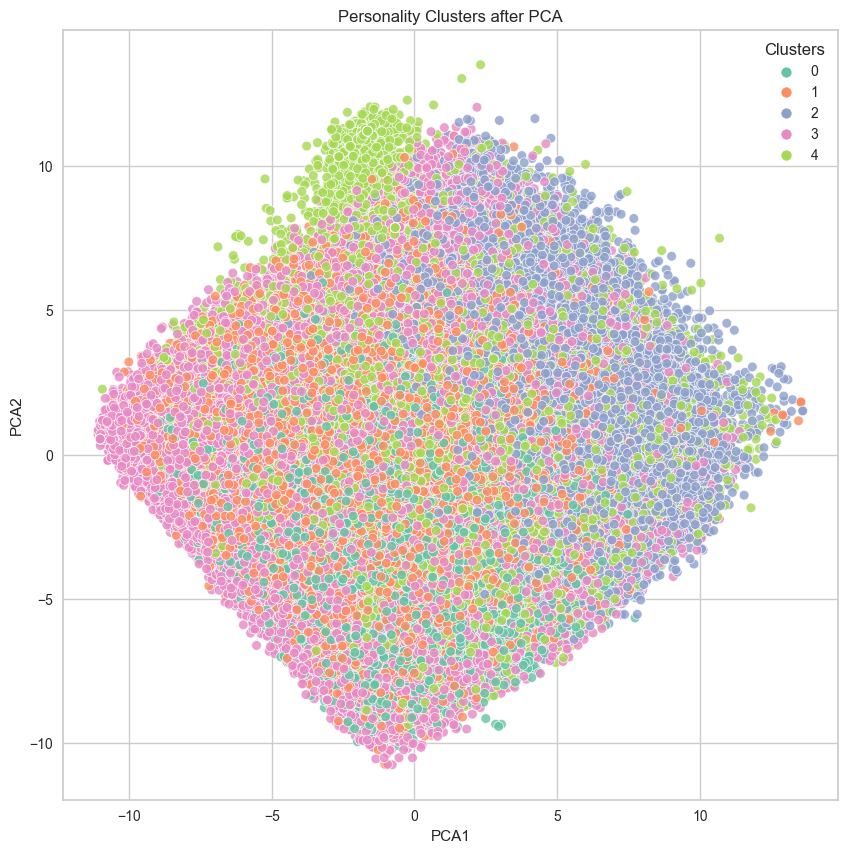

In [22]:
df = data_bf.copy()
model = GaussianMixture(n_components=5)
find_clusters(df,model,vis=True)

## Conclusion
Here DBscan and Meanshift clusterings show the worst results and comparatively all other models show good results. But birch and minibatch created low amount of clusters and gaussian mixture doesn't show definite clustering patern detection. So k-means is recomended model for this dataset clustering.

## Insights from the models
The dataset have 4 to 6 clear distinguilshable clusters meaning we can segment the personalities of the people participated in the questionaire.

## Sugestions
Dataset doesn't have any labeled part meaning that we cannot find the proper evaluation method for the clusterings making us inly have interppretation method. So added labeled data to the dataset could lead to identify the proper prediction.